## Part 1: Data Exploration

1. Read in the dataset, and display some summaries of the data.

In [11]:
import pandas as pd

df = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
df.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [12]:
df.describe()

,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [13]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
smoker,0
region,0
charges,0


2. Fix any concerns you have about the data.

  -I'm concerned about the categorical variables so I'm going to dummify them

In [14]:
import pandas as pd
pd.get_dummies(df)

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True
1,33,22.705,21984.47061,False,True,True,False,False,True,False,False
2,32,28.880,3866.85520,False,True,True,False,False,True,False,False
3,31,25.740,3756.62160,True,False,True,False,False,False,True,False
4,60,25.840,28923.13692,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,True,False,True,False,False,False,False,True
427,18,31.920,2205.98080,True,False,True,False,True,False,False,False
428,18,36.850,1629.83350,True,False,True,False,False,False,True,False
429,21,25.800,2007.94500,True,False,True,False,False,False,False,True


In [15]:
X = pd.get_dummies(df)
X["smoker_no"] * 1

,smoker_no
0,0
1,1
2,1
3,1
4,1
...,...
426,1
427,1
428,1
429,1


3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

<Axes: xlabel='age', ylabel='charges'>

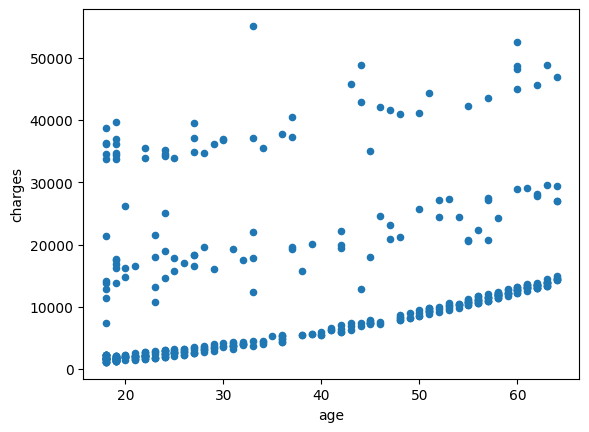

In [16]:
df.plot.scatter(x="age", y="charges")

Seems to be a correlation between age and more charges. There seems to be distinct grups of charges which could be explained by Sex or Smoking, but all group still increase with age.

<Axes: xlabel='bmi', ylabel='charges'>

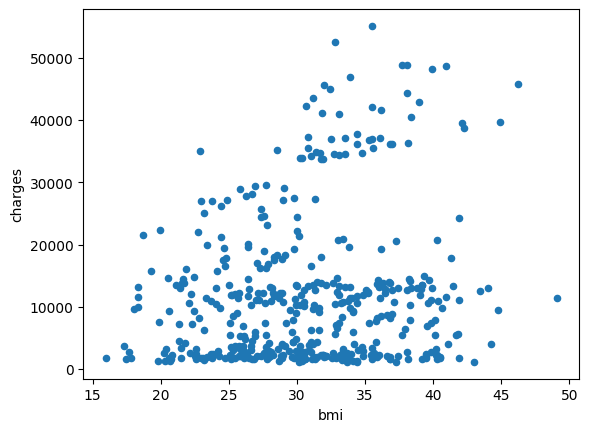

In [17]:
df.plot.scatter(x="bmi", y="charges")

Seems to a be a weak correaltion between higher bmi and charges. Suprising, because I would have expected to see a exponential realtionship.

<Axes: title={'center': 'charges'}, xlabel='smoker'>

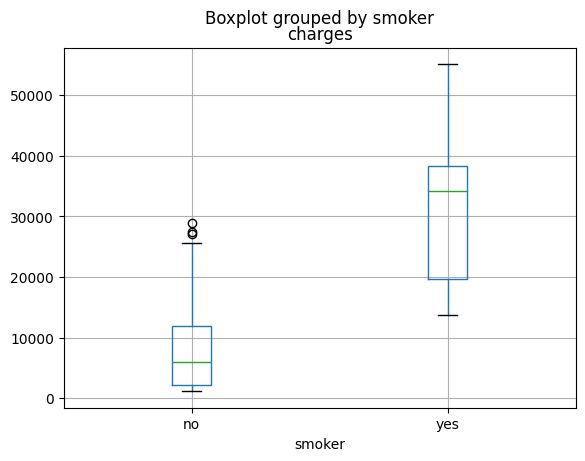

In [18]:
df.boxplot(column='charges', by='smoker')

Smokers have higher charges. No suprise.

## Part Two: Simple Linear Models

1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model_age = LinearRegression()

X=df[['age']]
y=df['charges']

model_age.fit(X,y)

model_age.coef_

array([228.79904937])

In [20]:
model_age.intercept_

np.float64(3611.758798507106)

In [21]:
pred_age = model_age.predict(df[['age']])
r2_age = r2_score(df['charges'], pred_age)
r2_age

0.09938105452062707

The model fit is very bad. The slope of the regression is 228 and when age is zero charges are 3611, which could be showing the cost of birth or pregrancy.

2. Make a model that also incorporates the variable sex. Report your results.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_dummy = pd.get_dummies(df[['age', 'sex']])

df_dummy.head()

,age,sex_female,sex_male
0,19,True,False
1,33,False,True
2,32,False,True
3,31,True,False
4,60,True,False


In [23]:
model_age_sex = LinearRegression()

X=df_dummy
y=df['charges']

model_age_sex.fit(X,y)
model_age.coef_

array([228.79904937])

In [24]:
model_age.intercept_

np.float64(3611.758798507106)

In [25]:
pred_age_sex = model_age_sex.predict(df_dummy)
r2_age_sex = r2_score(y, pred_age_sex)
r2_age_sex

0.10012952499706396

3. Now make a model that does not include sex, but does include smoker. Report your results

In [26]:
df_dummy_smoker = pd.get_dummies(df[['age', 'smoker']])

df_dummy_smoker.head()

,age,smoker_no,smoker_yes
0,19,False,True
1,33,True,False
2,32,True,False
3,31,True,False
4,60,True,False


In [27]:
model_age_smoker = LinearRegression()

X=df_dummy_smoker
y=df['charges']

model_age_smoker.fit(X,y)
model_age_smoker.coef_

array([   253.14535549, -12024.43371898,  12024.43371898])

In [28]:
model_age_smoker.intercept_

np.float64(9857.58142360151)

In [29]:
pred_age_smoker = model_age_smoker.predict(df_dummy_smoker)
r2_age_smoker = r2_score(y, pred_age_smoker)
r2_age_smoker

0.7603842948069404

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse_age_sex = mean_squared_error(df['charges'], pred_age_sex)
mse_age_sex

126633939.67937087

In [31]:
r2_age_smoker

0.7603842948069404

In [32]:
mse_age_smoker = mean_squared_error(df['charges'], pred_age_smoker)
mse_age_smoker

33719831.46524373

In [33]:
r2_age_sex

0.10012952499706396

I think the data Q3 model is better because the R^2 is way higher and the MSQE is way lower.

## Part Three: Multiple Linear Models

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [34]:
X = df[["age", "bmi"]]
y = df["charges"]

model = LinearRegression()
model.fit(X, y)

model.intercept_

np.float64(-4627.533445708479)

In [35]:
model.coef_

array([216.29721472, 283.20380126])

In [36]:
pred_age_bmi = model.predict(X)
mse_age_bmi = mean_squared_error(y, pred_age_bmi)
mse_age_bmi

123792439.58129103

In [37]:
r2_age_bmi = r2_score(y, pred_age_bmi)
r2_age_bmi

0.12032144234129338

In [83]:
mse_age = mean_squared_error(y_new, y_new_pred)
mse_age

21532023.680487107

In [84]:
pred_age = model_age.predict(df[['age']])
r2_age = r2_score(df['charges'], pred_age)
r2_age

0.09938105452062707

The MSE increases alot while the R^2 increases a little bit for the model in Parrt Two Q1.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [38]:
df["age_sq"] = df["age"] ** 2

X = df[["age", "age_sq"]]
y = df["charges"]

model_age_sq = LinearRegression()
model_age_sq.fit(X, y)

model_age_sq.intercept_

np.float64(2299.730568726698)

In [39]:
model_age_sq.coef_

array([308.42816984,  -1.00150889])

In [40]:
y_pred_age_sq = model_age_sq.predict(X)
mse_age_sq = mean_squared_error(y, y_pred_age_sq)
mse_age_sq

126710293.80956802

In [41]:
r2_age_sq = r2_score(y, y_pred_age_sq)
r2_age_sq

0.09958694669946933

R^2 for P2 Q1 (effect of age and bmi on charges) was 0.09938105452062707 and MSE was 123792439.58129103. The non linear model R^2 and MSE are both almost the same. So both of them work just as well.


3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [42]:
df["age_sq"] = df["age"] ** 2
df["age_cube"] = df["age"] ** 3
df["age_4"] = df["age"] ** 4

X = df[["age", "age_sq", "age_cube", "age_4"]]
y = df["charges"]

model_age_deg4 = LinearRegression()
model_age_deg4.fit(X, y)

model_age_deg4.intercept_

np.float64(68637.8978324551)

In [43]:
model_age_deg4.coef_

array([-7.94841022e+03,  3.58110163e+02, -6.47905090e+00,  4.12933982e-02])

In [44]:
y_pred_age_deg4 = model_age_deg4.predict(X)

mse_age_deg4 = mean_squared_error(y, y_pred_age_deg4)
mse_age_deg4

125550389.64569846

In [45]:
r2_age_deg4 = r2_score(y, y_pred_age_deg4)
r2_age_deg4

0.10782931453183653

R^2 for P2 Q1 which ran a regresion for effect of age and bmi on charges was 0.09938105452062707 and MSE was 123792439.58129103. The degree four R^2 is better but still not good at 0.1078 and MQE got worse. So the pro and con of the degree four model cancel eachother out and thier is no advantage to using it.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [46]:
df["age_sq"] = df["age"] ** 2
df["age_cube"] = df["age"] ** 3
df["age_4"] = df["age"] ** 4
df["age_5"] = df["age"] ** 5
df["age_6"] = df["age"] ** 6
df["age_7"] = df["age"] ** 7
df["age_8"] = df["age"] ** 8
df["age_9"] = df["age"] ** 9
df["age_10"] = df["age"] ** 10
df["age_11"] = df["age"] ** 11
df["age_12"] = df["age"] ** 12

X = df[["age", "age_sq", "age_cube", "age_4", "age_5", "age_6", "age_7", "age_8", "age_9", "age_10", "age_11", "age_12"]]
y = df["charges"]

model_age_deg12 = LinearRegression()
model_age_deg12_fitted = model_age_deg12.fit(X, y)

model_age_deg12.intercept_

np.float64(7452.282368586263)

In [47]:
model_age_deg12.coef_

array([ 3.04916765e-12,  1.74978335e-10,  3.30545342e-09,  7.57055097e-08,
        1.26243811e-06,  1.25112250e-05, -2.08395220e-08, -1.85914392e-08,
        4.09818497e-10, -2.52044358e-12, -1.01992093e-17,  1.42766017e-16])

In [48]:
y_pred_age_deg12 = model_age_deg12_fitted.predict(X)

mse_age_deg12 = mean_squared_error(y, y_pred_age_deg12)
mse_age_deg12

125373053.69364348

In [49]:
r2_age_deg12 = r2_score(y, y_pred_age_deg12)
r2_age_deg12

0.10908947739034713

R^2 stays basicly the same and and MSE increases. Not a better fit.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

I don't agree. The metrics are pretty simialr for all of them and user specific requierment could mean that for some peopel one model is better than another.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

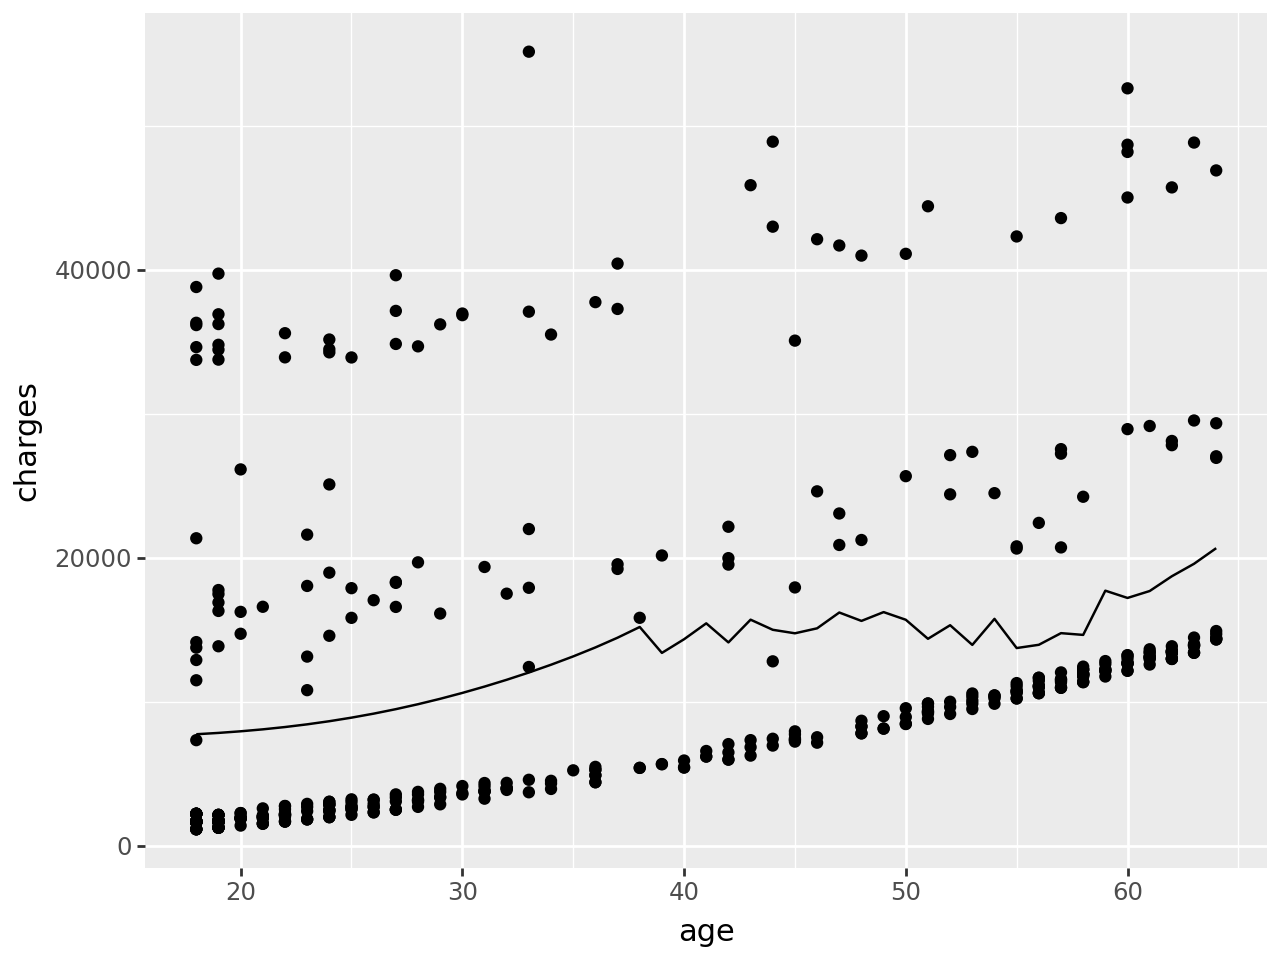

In [50]:
import numpy as np
import pandas as pd
from plotnine import ggplot, geom_point, geom_line, aes


df['preds'] = y_pred_age_deg12



ggplot(df, aes(x= "age", y="charges")) + geom_point() + geom_line(aes(x="age", y="preds"))

## Part Four: New data

In [51]:
import pandas as pd

df_new = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
df_new.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


Age only

In [52]:
X_age = df[["age"]]
y = df["charges"]

model_age = LinearRegression()
model_age.fit(X_age, y)

y_pred_new_age = model_age.predict(df_new[["age"]])
mse_age_new = mean_squared_error(df_new["charges"], y_pred_new_age)
mse_age_new

136077136.50195494

Age and BMI

In [53]:
X_age_bmi = df[["age", "bmi"]]

model_age_bmi = LinearRegression()
model_age_bmi.fit(X_age_bmi, y)

y_pred_new_age_bmi = model_age_bmi.predict(df_new[["age", "bmi"]])
mse_age_bmi_new = mean_squared_error(df_new["charges"], y_pred_new_age_bmi)
mse_age_bmi_new

132636406.1108129

Age, BMI, smoker

In [54]:
df_dummy = pd.get_dummies(df[["smoker"]])
df_new_dummy = pd.get_dummies(df_new[["smoker"]])

X = pd.DataFrame()
X["age"] = df["age"]
X["bmi"] = df["bmi"]
X["smoker_yes"] = df_dummy["smoker_yes"]

X_new = pd.DataFrame()
X_new["age"] = df_new["age"]
X_new["bmi"] = df_new["bmi"]
X_new["smoker_yes"] = df_new_dummy["smoker_yes"]

In [55]:
model_age_bmi_smoker = LinearRegression()
model_age_bmi_smoker.fit(X, df["charges"])

LinearRegression()

In [56]:
y_pred_new = model_age_bmi_smoker.predict(X_new)

mse_age_bmi_smoker_new = mean_squared_error(df_new["charges"], y_pred_new)
mse_age_bmi_smoker_new

35377541.24141632

Age, bmi, interaction with smoker

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_dummy = pd.get_dummies(df[["smoker"]])
df_new_dummy = pd.get_dummies(df_new[["smoker"]])

X_abc = pd.DataFrame()
X_abc["age"] = df["age"]
X_abc["bmi"] = df["bmi"]
X_abc["smoker_yes"] = df_dummy["smoker_yes"]

y = df["charges"]

model_abc = LinearRegression()
model_abc.fit(X_abc, y)

LinearRegression()

In [58]:
X_new_abc = pd.DataFrame()
X_new_abc["age"] = df_new["age"]
X_new_abc["bmi"] = df_new["bmi"]
X_new_abc["smoker_yes"] = df_new_dummy["smoker_yes"]

In [59]:
y_pred_new_abc = model_abc.predict(X_new_abc)

mse_abc_new = mean_squared_error(df_new["charges"], y_pred_new_abc)
mse_abc_new

35377541.24141632

Age, bmi, and smoker, and age and bmi having an interaction with smoker

In [60]:
df_dummy = pd.get_dummies(df[["smoker"]])
df_new_dummy = pd.get_dummies(df_new[["smoker"]])

X_abc_full = pd.DataFrame()
X_abc_full["smoker_yes"] = df_dummy["smoker_yes"]
X_abc_full["age_smoker_yes"] = df["age"] * df_dummy["smoker_yes"]
X_abc_full["bmi_smoker_yes"] = df["bmi"] * df_dummy["smoker_yes"]
X_abc_full["age"] = df["age"]
X_abc_full["bmi"] = df["bmi"]

y = df["charges"]

model_abc_full = LinearRegression()
model_abc_full.fit(X_abc_full, y)

LinearRegression()

In [61]:
X_new_abc_full = pd.DataFrame()

X_new_abc_full["smoker_yes"] = df_new_dummy["smoker_yes"]
X_new_abc_full["age_smoker_yes"] = df_new["age"] * df_new_dummy["smoker_yes"]
X_new_abc_full["bmi_smoker_yes"] = df_new["bmi"] * df_new_dummy["smoker_yes"]
X_new_abc_full["age"] = df_new["age"]
X_new_abc_full["bmi"] = df_new["bmi"]


In [62]:
y_pred_new_abc_full = model_abc_full.predict(X_new_abc_full)

mse_abc_full_new = mean_squared_error(df_new["charges"], y_pred_new_abc_full)
mse_abc_full_new

21786256.86685249

The model that is best to use is the one with age, bmi, and smoker as predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker) here is the plot

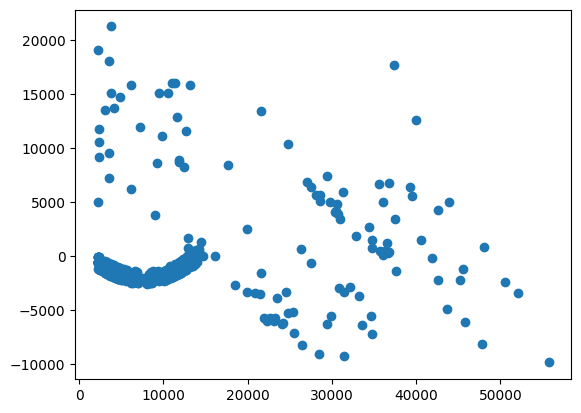

In [63]:
import matplotlib.pyplot as plt

y_pred_abc_full = model_abc_full.predict(X_abc_full)
residuals_abc_full = y - y_pred_abc_full

plt.scatter(y_pred_abc_full, residuals_abc_full)
plt.show()



## Part 5: full exploration

In [72]:
X_full = pd.DataFrame()
X_full["age"] = df["age"]
X_full["bmi"] = df["bmi"]
X_full["smoker_yes"] = df_dummy["smoker_yes"]


In [73]:
X_full["age_sq"] = df["age"] ** 2
X_full["bmi_sq"] = df["bmi"] ** 2
X_full["age_bmi"] = df["age"] * df["bmi"]
X_full["age_smoker_yes"] = df["age"] * df_dummy["smoker_yes"]
X_full["bmi_smoker_yes"] = df["bmi"] * df_dummy["smoker_yes"]

y = df["charges"]

model_full = LinearRegression()
model_full.fit(X_full, y)

LinearRegression()

In [74]:
X_new_full = pd.DataFrame()
X_new_full["age"] = df_new["age"]
X_new_full["bmi"] = df_new["bmi"]
X_new_full["smoker_yes"] = df_new_dummy["smoker_yes"]
X_new_full["age_sq"] = df_new["age"] ** 2
X_new_full["bmi_sq"] = df_new["bmi"] ** 2
X_new_full["age_bmi"] = df_new["age"] * df_new["bmi"]
X_new_full["age_smoker_yes"] = df_new["age"] * df_new_dummy["smoker_yes"]
X_new_full["bmi_smoker_yes"] = df_new["bmi"] * df_new_dummy["smoker_yes"]

y_new = df_new["charges"]

In [80]:
y_new_pred = model_full.predict(X_new_full)

mse_new = mean_squared_error(y_new, y_new_pred)
mse_new

21532023.680487107

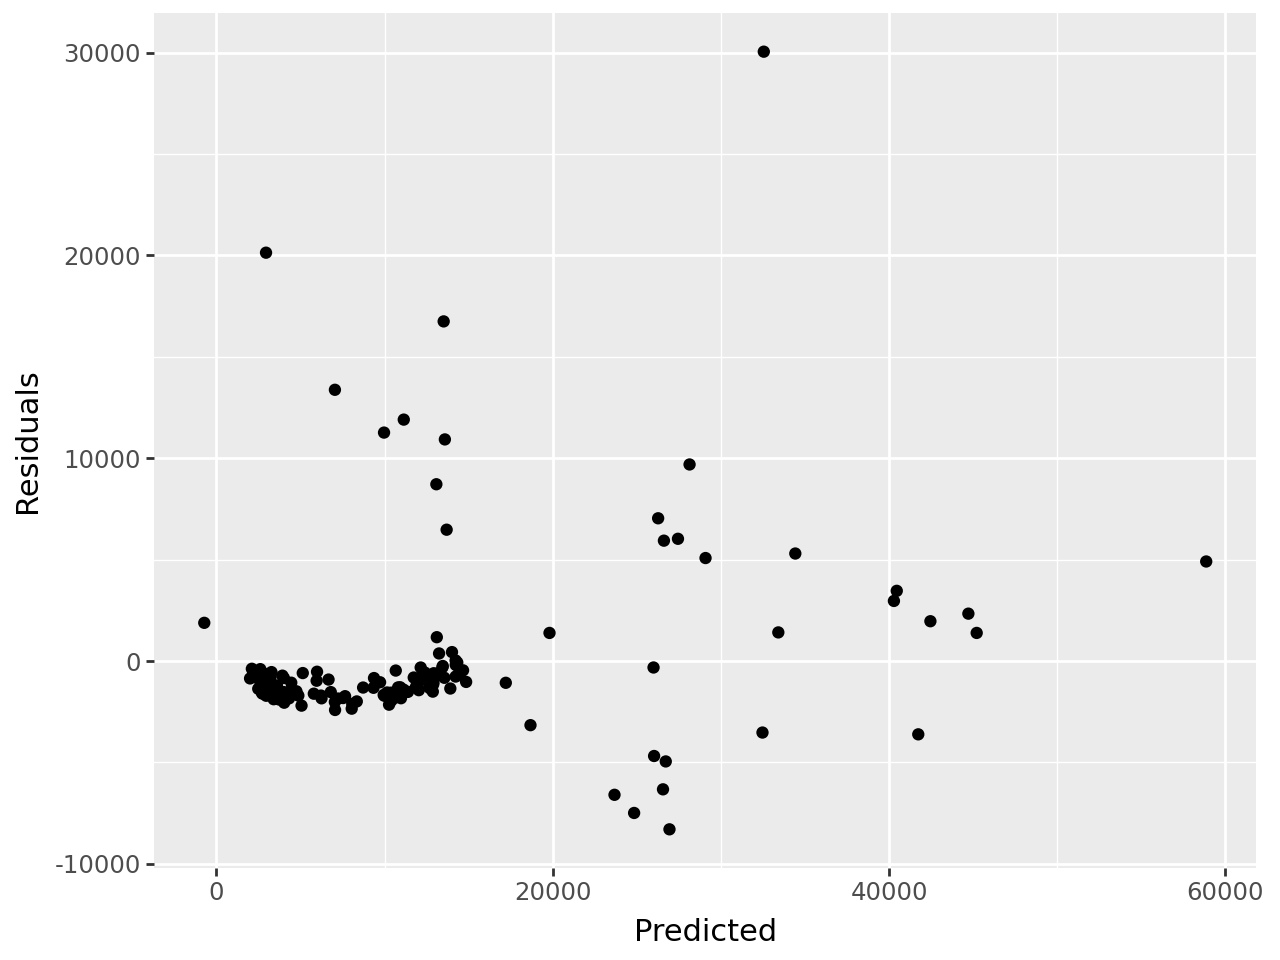

In [79]:
df_residual = pd.DataFrame({"Predicted": y_new_pred,"Residuals": y_new - y_new_pred})

ggplot(df_residual, aes(x="Predicted", y="Residuals"))+ geom_point()

Things to improve: undertstanding what each object is and what it contains, doodle stuff to visualsy undersant.